/home/antoine/.local/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


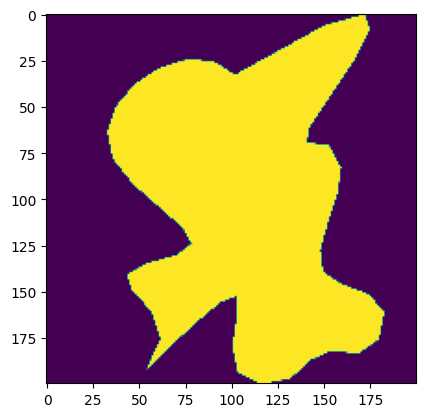

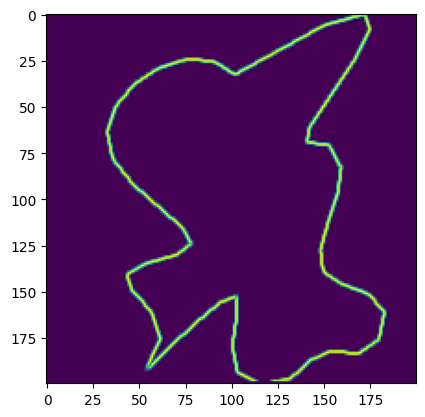

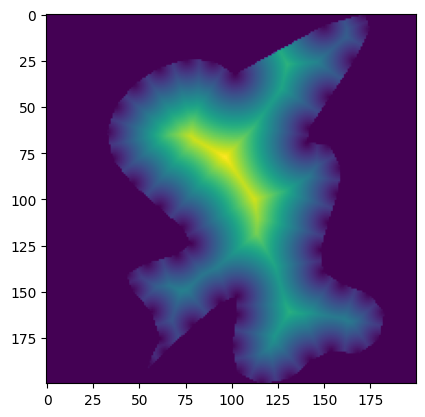

/home/antoine/Documents/torch_contour/torch_contour/torch_contour1.py:363: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1003.)
  smoothed_tensor = F.conv1d(out_moved_axis, self.kernel, padding="same", groups=2)


In [1]:
from torch_contour.torch_contour1 import Contour_to_distance_map, Contour_to_mask, Draw_contour, Smoothing
import torch
import matplotlib.pyplot as plt

polygons1 = torch.tensor([[[[0.1640, 0.5085],
          [0.1267, 0.4491],
          [0.1228, 0.3772],
          [0.1461, 0.3027],
          [0.1907, 0.2356],
          [0.2503, 0.1857],
          [0.3190, 0.1630],
          [0.3905, 0.1774],
          [0.4595, 0.2317],
          [0.5227, 0.3037],
          [0.5774, 0.3658],
          [0.6208, 0.3905],
          [0.6505, 0.3513],
          [0.6738, 0.2714],
          [0.7029, 0.2152],
          [0.7461, 0.2298],
          [0.8049, 0.2828],
          [0.8776, 0.3064],
          [0.9473, 0.2744],
          [0.9606, 0.2701],
          [0.9138, 0.3192],
          [0.8415, 0.3947],
          [0.7793, 0.4689],
          [0.7627, 0.5137],
          [0.8124, 0.5142],
          [0.8961, 0.5011],
          [0.9696, 0.5158],
          [1.0000, 0.5795],
          [0.9858, 0.6581],
          [0.9355, 0.7131],
          [0.9104, 0.7682],
          [0.9184, 0.8406],
          [0.8799, 0.8974],
          [0.8058, 0.9121],
          [0.7568, 0.8694],
          [0.7305, 0.7982],
          [0.6964, 0.7466],
          [0.6378, 0.7394],
          [0.5639, 0.7597],
          [0.4864, 0.7858],
          [0.4153, 0.7953],
          [0.3524, 0.7609],
          [0.3484, 0.7028],
          [0.3092, 0.7089],
          [0.2255, 0.7632],
          [0.1265, 0.8300],
          [0.0416, 0.8736],
          [0.0000, 0.8584],
          [0.0310, 0.7486],
          [0.1640, 0.5085]]]], dtype=torch.float32)  

width = 200

Mask = Contour_to_mask(width)
Draw = Draw_contour(width)
Dmap = Contour_to_distance_map(width)
smoother = Smoothing(sigma=1)

plt.imshow(Mask(polygons1).cpu().detach().numpy()[0,0])
plt.show()
plt.imshow(Draw(polygons1).cpu().detach().numpy()[0,0])
plt.show()
plt.imshow(Dmap(polygons1).cpu().detach().numpy()[0,0])
plt.show()

smoothed_polygons1_ = smoother(polygons1)

In [2]:
from torch_contour.torch_contour1 import CleanContours,area, perimeter, hausdorff_distance, curvature
import torch


polygons2 = torch.tensor([[[[0.0460, 0.3955],
          [0.0000, 0.2690],
          [0.0179, 0.1957],
          [0.0789, 0.1496],
          [0.1622, 0.1049],
          [0.2495, 0.0566],
          [0.3287, 0.0543],
          [0.3925, 0.1280],
          [0.4451, 0.2231],
          [0.4928, 0.2692],
          [0.5436, 0.2215],
          [0.6133, 0.1419],
          [0.7077, 0.1118],
          [0.7603, 0.1569],
          [0.7405, 0.2511],
          [0.6742, 0.3440],
          [0.6042, 0.4099],
          [0.6036, 0.4780],
          [0.6693, 0.5520],
          [0.7396, 0.6100],
          [0.8190, 0.6502],
          [0.9172, 0.6815],
          [0.9818, 0.7310],
          [0.9605, 0.8186],
          [0.8830, 0.9023],
          [0.8048, 0.9205],
          [0.7506, 0.8514],
          [0.6597, 0.7975],
          [0.5866, 0.8195],
          [0.5988, 0.9145],
          [0.6419, 1.0000],
          [0.6529, 0.9978],
          [0.6253, 0.9186],
          [0.5714, 0.8027],
          [0.5035, 0.6905],
          [0.4340, 0.6223],
          [0.3713, 0.6260],
          [0.3116, 0.6854],
          [0.2478, 0.7748],
          [0.1732, 0.8687],
          [0.0892, 0.9420],
          [0.0353, 0.9737],
          [0.0452, 0.9514],
          [0.1028, 0.8855],
          [0.1831, 0.7907],
          [0.2610, 0.6817],
          [0.3113, 0.5730],
          [0.3090, 0.4793],
          [0.2289, 0.4153],
          [0.0460, 0.3955]]]], dtype = torch.float32)  


area_ = area(polygons2)
perimeter_ = perimeter(polygons2)
curvs = curvature(polygons2)
hausdorff_dists = hausdorff_distance(polygons1, polygons2)


[ 2  3  4  5  6  7  8  9 10]
[]


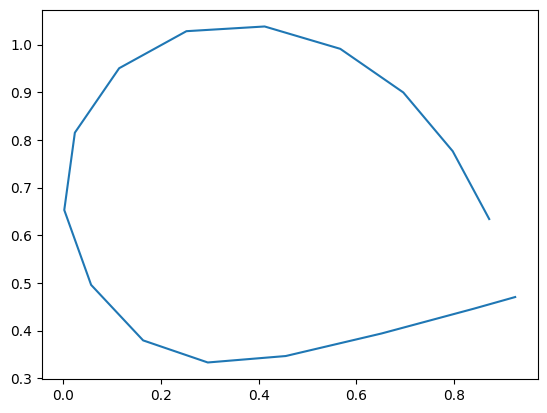

In [11]:
cleaner = CleanContours()
# cleaned_contours = cleaner.clean_contours(polygons2.cpu().detach().numpy())
cleaned_interpolated_contours = cleaner.clean_contours_and_interpolate(coordinates[None,None])
plt.plot(cleaned_interpolated_contours[0,0][:,0], cleaned_interpolated_contours[0,0][:,1])
plt.show()

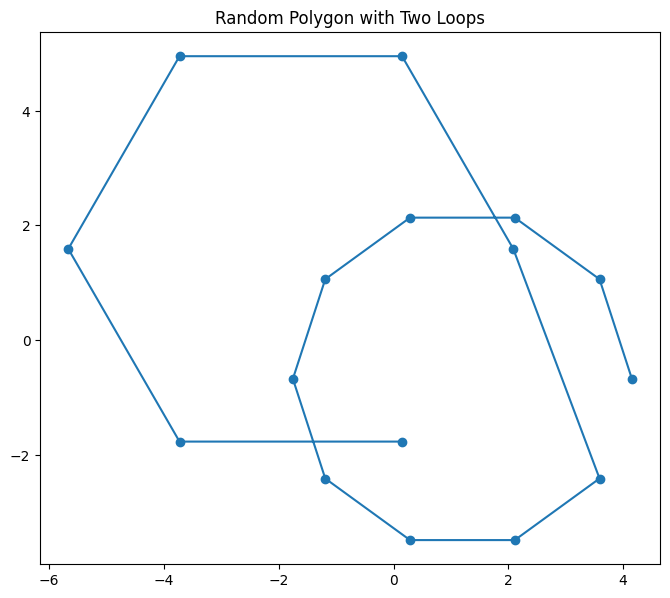

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_loops(n, min_nodes=3, max_nodes=10, min_radius=1, max_radius=5, space=2):
    total_nodes = 0
    coordinates = []
    
    for i in range(2):  # Two loops
        # Random number of nodes for the loop
        num_nodes = np.random.randint(min_nodes, max_nodes + 1)
        total_nodes += num_nodes
        
        # Random radius for the loop
        radius = np.random.uniform(min_radius, max_radius)
        
        # Random center for the loop
        center_x, center_y = np.random.uniform(-space, space, size=2)
        
        # Generate loop coordinates
        angles = np.linspace(0, 2 * np.pi, num_nodes, endpoint=False)
        x = center_x + radius * np.cos(angles)
        y = center_y + radius * np.sin(angles)
        
        loop_coordinates = np.vstack((x, y)).T
        coordinates.append(loop_coordinates)
    
    return np.vstack(coordinates)

# Generate random loops
n = 20
coordinates = generate_random_loops(n)

# Plotting the coordinates to visualize the loops
plt.figure(figsize=(8, 8))
plt.plot(coordinates[:, 0], coordinates[:, 1], 'o-')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Random Polygon with Two Loops')
plt.show()

coordinates = (coordinates - np.min(coordinates))/(np.max(coordinates - np.min(coordinates)))
